In [58]:
%matplotlib inline

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series

In [60]:
bike_sharing_data = pd.read_csv("data/train.csv")

In [61]:
bike_sharing_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [62]:
bike_sharing_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [63]:
bike_sharing_data.datetime = pd.to_datetime(bike_sharing_data.datetime)

In [64]:
bike_sharing_data.set_index("datetime").loc["2011-09-01 15:00"]

season          3.0000
holiday         0.0000
workingday      1.0000
weather         1.0000
temp           29.5200
atemp          33.3350
humidity       51.0000
windspeed       8.9981
casual         39.0000
registered    135.0000
count         174.0000
Name: 2011-09-01 15:00:00, dtype: float64

In [65]:
bike_sharing_data.set_index("datetime").loc["2011-09-01":"2011-09-11"]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-09-01 00:00:00,3,0,1,1,24.60,28.790,78,7.0015,18,33,51
2011-09-01 01:00:00,3,0,1,1,24.60,29.545,73,6.0032,7,14,21
2011-09-01 02:00:00,3,0,1,1,23.78,27.275,78,6.0032,14,11,25
2011-09-01 03:00:00,3,0,1,1,23.78,27.275,78,6.0032,7,7,14
2011-09-01 04:00:00,3,0,1,1,22.96,26.515,83,6.0032,0,7,7
...,...,...,...,...,...,...,...,...,...,...,...
2011-09-11 19:00:00,3,0,0,1,26.24,30.305,69,7.0015,101,232,333
2011-09-11 20:00:00,3,0,0,1,25.42,29.545,73,7.0015,65,161,226
2011-09-11 21:00:00,3,0,0,1,26.24,30.305,69,0.0000,45,114,159


In [66]:
bike_sharing_data = bike_sharing_data.set_index("datetime")

In [67]:
bike_sharing_data.workingday.astype('bool')

datetime
2011-01-01 00:00:00    False
2011-01-01 01:00:00    False
2011-01-01 02:00:00    False
2011-01-01 03:00:00    False
2011-01-01 04:00:00    False
                       ...  
2012-12-19 19:00:00     True
2012-12-19 20:00:00     True
2012-12-19 21:00:00     True
2012-12-19 22:00:00     True
2012-12-19 23:00:00     True
Name: workingday, Length: 10886, dtype: bool

In [68]:
categorical_features_names = ['season', 'holiday', 'workingday', 'weather']
categorical_features = pd.get_dummies(bike_sharing_data[['season', 'holiday', 'workingday', 'weather']].astype(str), drop_first=True)
bike_sharing_data = bike_sharing_data.merge(categorical_features, left_index=True, right_index=True)
bike_sharing_data = bike_sharing_data.drop(columns=categorical_features_names)

In [69]:
bike_sharing_data

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,3,13,16,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,9.02,13.635,80,0.0000,8,32,40,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,9.02,13.635,80,0.0000,5,27,32,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,9.84,14.395,75,0.0000,3,10,13,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,9.84,14.395,75,0.0000,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,15.58,19.695,50,26.0027,7,329,336,0,0,1,0,1,0,0,0
2012-12-19 20:00:00,14.76,17.425,57,15.0013,10,231,241,0,0,1,0,1,0,0,0
2012-12-19 21:00:00,13.94,15.910,61,15.0013,4,164,168,0,0,1,0,1,0,0,0


In [70]:
bike_sharing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000
season_2,10886.0,0.251056,0.433641,0.00,0.0000,0.000,1.0000,1.0000
season_3,10886.0,0.251056,0.433641,0.00,0.0000,0.000,1.0000,1.0000
season_4,10886.0,0.251148,0.433694,0.00,0.0000,0.000,1.0000,1.0000


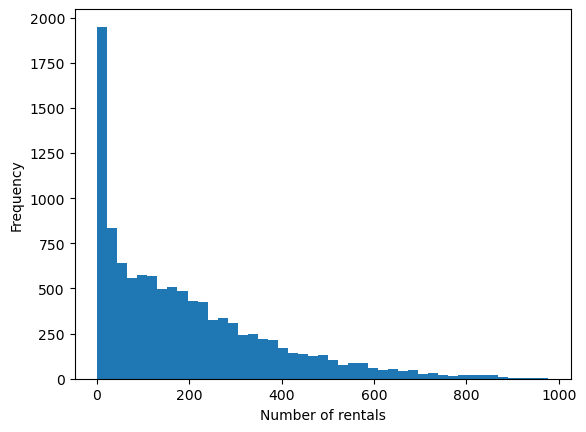

In [71]:
plt.hist(bike_sharing_data["count"], bins = "fd")
plt.xlabel("Number of rentals")
plt.ylabel("Frequency")

plt.show()

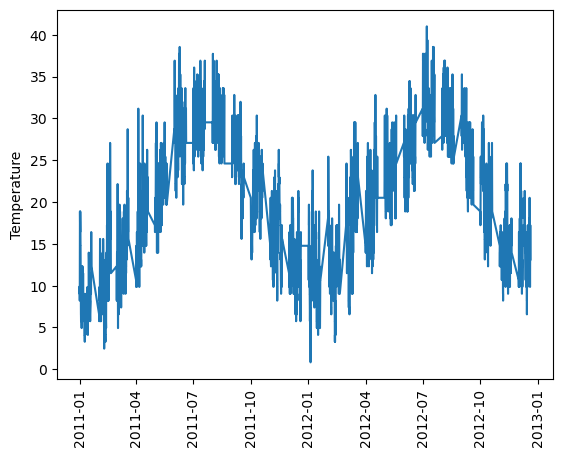

In [72]:
plt.plot(bike_sharing_data.temp)
plt.xticks(rotation=90)

plt.ylabel("Temperature")
plt.show()

In [73]:
bike_sharing_data.resample("M").apply(lambda x: x+500)

/var/folders/gz/8vskldwd7qd2zlmwlqp8xgtr0000gn/T/ipykernel_85827/3329789181.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  bike_sharing_data.resample("M").apply(lambda x: x+500)


,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,509.84,514.395,581,500.0000,503,513,516,500,500,500,500,500,500,500,500
2011-01-01 01:00:00,509.02,513.635,580,500.0000,508,532,540,500,500,500,500,500,500,500,500
2011-01-01 02:00:00,509.02,513.635,580,500.0000,505,527,532,500,500,500,500,500,500,500,500
2011-01-01 03:00:00,509.84,514.395,575,500.0000,503,510,513,500,500,500,500,500,500,500,500
2011-01-01 04:00:00,509.84,514.395,575,500.0000,500,501,501,500,500,500,500,500,500,500,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,515.58,519.695,550,526.0027,507,829,836,500,500,501,500,501,500,500,500
2012-12-19 20:00:00,514.76,517.425,557,515.0013,510,731,741,500,500,501,500,501,500,500,500
2012-12-19 21:00:00,513.94,515.910,561,515.0013,504,664,668,500,500,501,500,501,500,500,500


In [74]:
bike_sharing_data.resample("M").mean()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
datetime,,,,,,,,,,,,,,,
2011-01-31,8.633782,10.767981,56.308585,13.749830,4.658933,49.986079,54.645012,0.0,0.0,0.0,0.055684,0.612529,0.320186,0.060325,0.000000
2011-02-28,11.331076,13.999922,53.580717,15.509298,8.466368,65.174888,73.641256,0.0,0.0,0.0,0.000000,0.733184,0.221973,0.078475,0.000000
2011-03-31,14.063184,16.895594,55.923767,16.033866,17.735426,69.114350,86.849776,0.0,0.0,0.0,0.000000,0.735426,0.295964,0.085202,0.000000
2011-04-30,17.776879,21.239835,66.285714,15.844234,26.876923,84.149451,111.026374,1.0,0.0,0.0,0.052747,0.630769,0.364835,0.127473,0.000000
2011-05-31,21.528596,25.455143,71.421053,12.355358,34.791667,140.017544,174.809211,1.0,0.0,0.0,0.000000,0.736842,0.300439,0.114035,0.000000
2011-06-30,28.191096,32.150910,58.291667,11.930099,42.982456,153.894737,196.877193,1.0,0.0,0.0,0.000000,0.684211,0.199561,0.039474,0.000000
2011-07-31,29.967763,34.011656,60.403509,11.960793,57.335526,146.278509,203.614035,0.0,1.0,0.0,0.052632,0.631579,0.122807,0.030702,0.000000
2011-08-31,29.667456,33.461711,62.166667,12.480543,38.552632,144.114035,182.666667,0.0,1.0,0.0,0.000000,0.789474,0.190789,0.076754,0.000000
2011-09-30,25.141236,28.693256,74.830022,11.501445,40.421634,134.200883,174.622517,0.0,1.0,0.0,0.052980,0.629139,0.326711,0.145695,0.000000


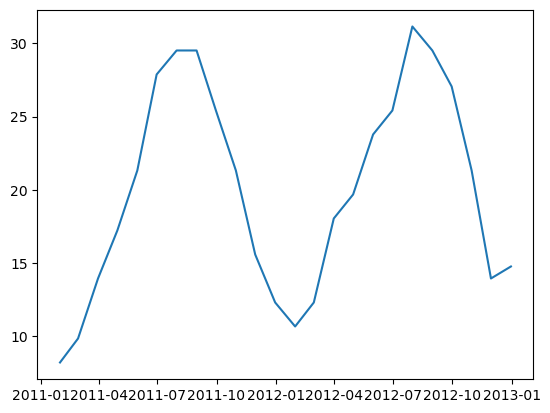

In [75]:
plt.plot(bike_sharing_data.resample("M").temp.median())

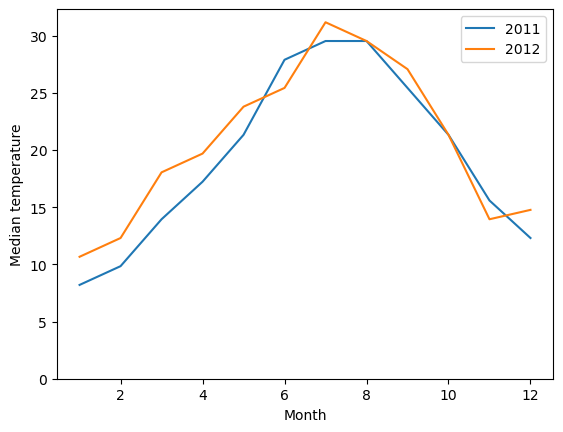

In [76]:
plt.plot(range(1, 13), bike_sharing_data.resample("M").temp.median()[:12], label="2011")
plt.plot(range(1, 13), bike_sharing_data.resample("M").temp.median()[12:], label="2012")

plt.ylim(0, plt.ylim()[1])
plt.xlabel("Month")
plt.ylabel("Median temperature")
plt.legend()
plt.show()

In [77]:
bike_sharing_data.index.year

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='datetime', length=10886)

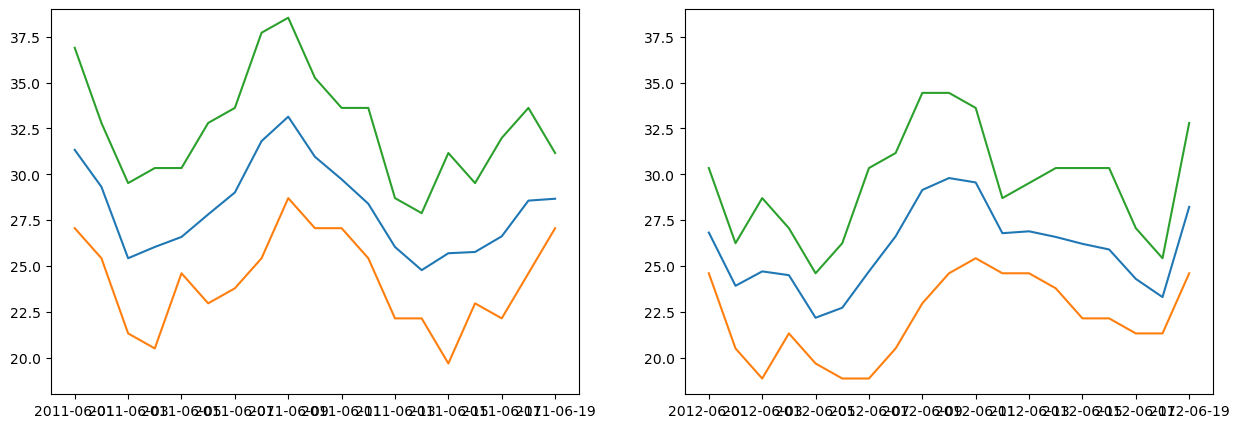

In [78]:
plt.figure(figsize=(15, 5))
plt.subplot(121)

plt.plot(bike_sharing_data.loc["2011-06"].temp.resample("D").mean())
plt.plot(bike_sharing_data.loc["2011-06"].temp.resample("D").min())
plt.plot(bike_sharing_data.loc["2011-06"].temp.resample("D").max())
plt.ylim(18, 39)

plt.subplot(122)
plt.plot(bike_sharing_data.loc["2012-06"].temp.resample("D").mean())
plt.plot(bike_sharing_data.loc["2012-06"].temp.resample("D").min())
plt.plot(bike_sharing_data.loc["2012-06"].temp.resample("D").max())
plt.ylim(18, 39)

plt.show()

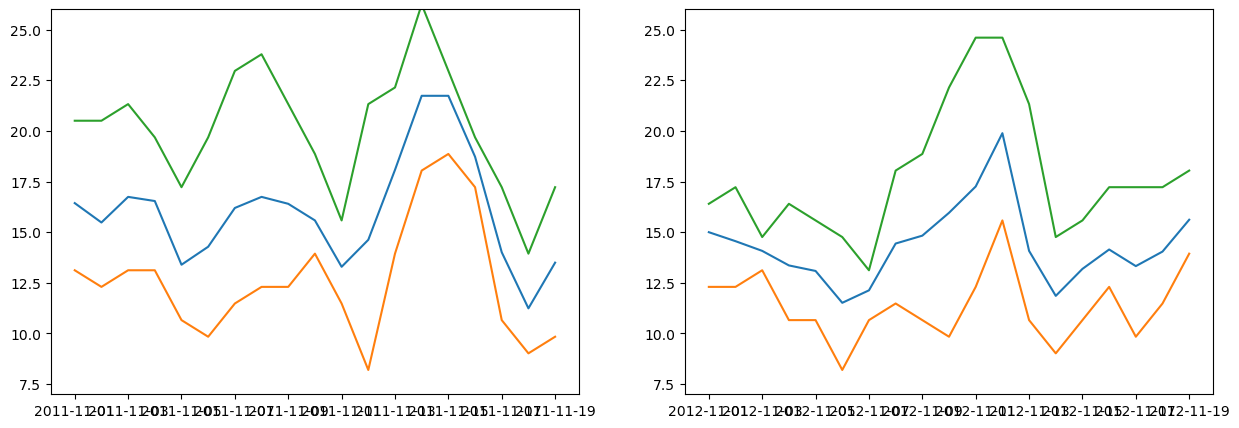

In [79]:
plt.figure(figsize=(15, 5))
plt.subplot(121)

plt.plot(bike_sharing_data.loc["2011-11"].temp.resample("D").mean())
plt.plot(bike_sharing_data.loc["2011-11"].temp.resample("D").min())
plt.plot(bike_sharing_data.loc["2011-11"].temp.resample("D").max())
plt.ylim(7, 26)

plt.subplot(122)
plt.plot(bike_sharing_data.loc["2012-11"].temp.resample("D").mean())
plt.plot(bike_sharing_data.loc["2012-11"].temp.resample("D").min())
plt.plot(bike_sharing_data.loc["2012-11"].temp.resample("D").max())
plt.ylim(7, 26)

plt.show()

In [80]:
bike_attributes, bike_targets = bike_sharing_data.drop(columns=["casual", "registered", "count"]), bike_sharing_data['count']

In [81]:
linear_model = LinearRegression()
linear_model.fit(bike_attributes, bike_targets)

LinearRegression()

In [82]:
linear_model.score(bike_attributes, bike_targets)

0.2767549620228168

In [83]:
predictions = linear_model.predict(bike_attributes)

In [84]:
np.sqrt(mean_squared_error(bike_targets, predictions))

154.04507737677713

ConversionError: Failed to convert value(s) to axis units: array(['2011-06-06T00:00:00.000000000', '2011-06-06T01:00:00.000000000',
       '2011-06-06T02:00:00.000000000', '2011-06-06T03:00:00.000000000',
       '2011-06-06T04:00:00.000000000', '2011-06-06T05:00:00.000000000',
       '2011-06-06T06:00:00.000000000', '2011-06-06T07:00:00.000000000',
       '2011-06-06T08:00:00.000000000', '2011-06-06T09:00:00.000000000',
       '2011-06-06T10:00:00.000000000', '2011-06-06T11:00:00.000000000',
       '2011-06-06T12:00:00.000000000', '2011-06-06T13:00:00.000000000',
       '2011-06-06T14:00:00.000000000', '2011-06-06T15:00:00.000000000',
       '2011-06-06T16:00:00.000000000', '2011-06-06T17:00:00.000000000',
       '2011-06-06T18:00:00.000000000', '2011-06-06T19:00:00.000000000',
       '2011-06-06T20:00:00.000000000', '2011-06-06T21:00:00.000000000',
       '2011-06-06T22:00:00.000000000', '2011-06-06T23:00:00.000000000',
       '2011-06-07T00:00:00.000000000', '2011-06-07T01:00:00.000000000',
       '2011-06-07T02:00:00.000000000', '2011-06-07T03:00:00.000000000',
       '2011-06-07T04:00:00.000000000', '2011-06-07T05:00:00.000000000',
       '2011-06-07T06:00:00.000000000', '2011-06-07T07:00:00.000000000',
       '2011-06-07T08:00:00.000000000', '2011-06-07T09:00:00.000000000',
       '2011-06-07T10:00:00.000000000', '2011-06-07T11:00:00.000000000',
       '2011-06-07T12:00:00.000000000', '2011-06-07T13:00:00.000000000',
       '2011-06-07T14:00:00.000000000', '2011-06-07T15:00:00.000000000',
       '2011-06-07T16:00:00.000000000', '2011-06-07T17:00:00.000000000',
       '2011-06-07T18:00:00.000000000', '2011-06-07T19:00:00.000000000',
       '2011-06-07T20:00:00.000000000', '2011-06-07T21:00:00.000000000',
       '2011-06-07T22:00:00.000000000', '2011-06-07T23:00:00.000000000',
       '2011-06-08T00:00:00.000000000', '2011-06-08T01:00:00.000000000',
       '2011-06-08T02:00:00.000000000', '2011-06-08T03:00:00.000000000',
       '2011-06-08T04:00:00.000000000', '2011-06-08T05:00:00.000000000',
       '2011-06-08T06:00:00.000000000', '2011-06-08T07:00:00.000000000',
       '2011-06-08T08:00:00.000000000', '2011-06-08T09:00:00.000000000',
       '2011-06-08T10:00:00.000000000', '2011-06-08T11:00:00.000000000',
       '2011-06-08T12:00:00.000000000', '2011-06-08T13:00:00.000000000',
       '2011-06-08T14:00:00.000000000', '2011-06-08T15:00:00.000000000',
       '2011-06-08T16:00:00.000000000', '2011-06-08T17:00:00.000000000',
       '2011-06-08T18:00:00.000000000', '2011-06-08T19:00:00.000000000',
       '2011-06-08T20:00:00.000000000', '2011-06-08T21:00:00.000000000',
       '2011-06-08T22:00:00.000000000', '2011-06-08T23:00:00.000000000',
       '2011-06-09T00:00:00.000000000', '2011-06-09T01:00:00.000000000',
       '2011-06-09T02:00:00.000000000', '2011-06-09T03:00:00.000000000',
       '2011-06-09T04:00:00.000000000', '2011-06-09T05:00:00.000000000',
       '2011-06-09T06:00:00.000000000', '2011-06-09T07:00:00.000000000',
       '2011-06-09T08:00:00.000000000', '2011-06-09T09:00:00.000000000',
       '2011-06-09T10:00:00.000000000', '2011-06-09T11:00:00.000000000',
       '2011-06-09T12:00:00.000000000', '2011-06-09T13:00:00.000000000',
       '2011-06-09T14:00:00.000000000', '2011-06-09T15:00:00.000000000',
       '2011-06-09T16:00:00.000000000', '2011-06-09T17:00:00.000000000',
       '2011-06-09T18:00:00.000000000', '2011-06-09T19:00:00.000000000',
       '2011-06-09T20:00:00.000000000', '2011-06-09T21:00:00.000000000',
       '2011-06-09T22:00:00.000000000', '2011-06-09T23:00:00.000000000',
       '2011-06-10T00:00:00.000000000', '2011-06-10T01:00:00.000000000',
       '2011-06-10T02:00:00.000000000', '2011-06-10T03:00:00.000000000',
       '2011-06-10T04:00:00.000000000', '2011-06-10T05:00:00.000000000',
       '2011-06-10T06:00:00.000000000', '2011-06-10T07:00:00.000000000',
       '2011-06-10T08:00:00.000000000', '2011-06-10T09:00:00.000000000',
       '2011-06-10T10:00:00.000000000', '2011-06-10T11:00:00.000000000',
       '2011-06-10T12:00:00.000000000', '2011-06-10T13:00:00.000000000',
       '2011-06-10T14:00:00.000000000', '2011-06-10T15:00:00.000000000',
       '2011-06-10T16:00:00.000000000', '2011-06-10T17:00:00.000000000',
       '2011-06-10T18:00:00.000000000', '2011-06-10T19:00:00.000000000',
       '2011-06-10T20:00:00.000000000', '2011-06-10T21:00:00.000000000',
       '2011-06-10T22:00:00.000000000', '2011-06-10T23:00:00.000000000',
       '2011-06-11T00:00:00.000000000', '2011-06-11T01:00:00.000000000',
       '2011-06-11T02:00:00.000000000', '2011-06-11T03:00:00.000000000',
       '2011-06-11T04:00:00.000000000', '2011-06-11T05:00:00.000000000',
       '2011-06-11T06:00:00.000000000', '2011-06-11T07:00:00.000000000',
       '2011-06-11T08:00:00.000000000', '2011-06-11T09:00:00.000000000',
       '2011-06-11T10:00:00.000000000', '2011-06-11T11:00:00.000000000',
       '2011-06-11T12:00:00.000000000', '2011-06-11T13:00:00.000000000',
       '2011-06-11T14:00:00.000000000', '2011-06-11T15:00:00.000000000',
       '2011-06-11T16:00:00.000000000', '2011-06-11T17:00:00.000000000',
       '2011-06-11T18:00:00.000000000', '2011-06-11T19:00:00.000000000',
       '2011-06-11T20:00:00.000000000', '2011-06-11T21:00:00.000000000',
       '2011-06-11T22:00:00.000000000', '2011-06-11T23:00:00.000000000',
       '2011-06-12T00:00:00.000000000', '2011-06-12T01:00:00.000000000',
       '2011-06-12T02:00:00.000000000', '2011-06-12T03:00:00.000000000',
       '2011-06-12T04:00:00.000000000', '2011-06-12T05:00:00.000000000',
       '2011-06-12T06:00:00.000000000', '2011-06-12T07:00:00.000000000',
       '2011-06-12T08:00:00.000000000', '2011-06-12T09:00:00.000000000',
       '2011-06-12T10:00:00.000000000', '2011-06-12T11:00:00.000000000',
       '2011-06-12T12:00:00.000000000', '2011-06-12T13:00:00.000000000',
       '2011-06-12T14:00:00.000000000', '2011-06-12T15:00:00.000000000',
       '2011-06-12T16:00:00.000000000', '2011-06-12T17:00:00.000000000',
       '2011-06-12T18:00:00.000000000', '2011-06-12T19:00:00.000000000',
       '2011-06-12T20:00:00.000000000', '2011-06-12T21:00:00.000000000',
       '2011-06-12T22:00:00.000000000', '2011-06-12T23:00:00.000000000'],
      dtype='datetime64[ns]')

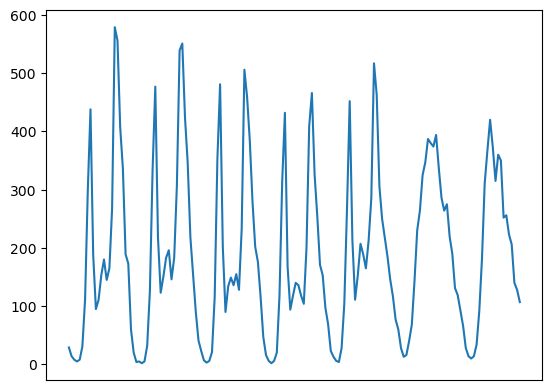

In [86]:
plt.plot(bike_targets.loc["2011-06-06": "2011-06-12"])
plt.axvline(["2011-06-11"], c = "r")
plt.show()

In [87]:
bike_targets.loc['2011-06-09']

datetime
2011-06-09 00:00:00     47
2011-06-09 01:00:00     16
2011-06-09 02:00:00      6
2011-06-09 03:00:00      2
2011-06-09 04:00:00      6
2011-06-09 05:00:00     20
2011-06-09 06:00:00    118
2011-06-09 07:00:00    314
2011-06-09 08:00:00    432
2011-06-09 09:00:00    168
2011-06-09 10:00:00     94
2011-06-09 11:00:00    118
2011-06-09 12:00:00    140
2011-06-09 13:00:00    136
2011-06-09 14:00:00    118
2011-06-09 15:00:00    104
2011-06-09 16:00:00    200
2011-06-09 17:00:00    409
2011-06-09 18:00:00    466
2011-06-09 19:00:00    326
2011-06-09 20:00:00    254
2011-06-09 21:00:00    171
2011-06-09 22:00:00    153
2011-06-09 23:00:00     97
Name: count, dtype: int64

In [ ]:
plt.plot(bike_targets.index, predictions, alpha=0.7)
plt.plot(bike_targets, alpha = 0.7)

ConversionError: Failed to convert value(s) to axis units: array(['2011-06-06T00:00:00.000000000', '2011-06-06T01:00:00.000000000',
       '2011-06-06T02:00:00.000000000', '2011-06-06T03:00:00.000000000',
       '2011-06-06T04:00:00.000000000', '2011-06-06T05:00:00.000000000',
       '2011-06-06T06:00:00.000000000', '2011-06-06T07:00:00.000000000',
       '2011-06-06T08:00:00.000000000', '2011-06-06T09:00:00.000000000',
       '2011-06-06T10:00:00.000000000', '2011-06-06T11:00:00.000000000',
       '2011-06-06T12:00:00.000000000', '2011-06-06T13:00:00.000000000',
       '2011-06-06T14:00:00.000000000', '2011-06-06T15:00:00.000000000',
       '2011-06-06T16:00:00.000000000', '2011-06-06T17:00:00.000000000',
       '2011-06-06T18:00:00.000000000', '2011-06-06T19:00:00.000000000',
       '2011-06-06T20:00:00.000000000', '2011-06-06T21:00:00.000000000',
       '2011-06-06T22:00:00.000000000', '2011-06-06T23:00:00.000000000',
       '2011-06-07T00:00:00.000000000', '2011-06-07T01:00:00.000000000',
       '2011-06-07T02:00:00.000000000', '2011-06-07T03:00:00.000000000',
       '2011-06-07T04:00:00.000000000', '2011-06-07T05:00:00.000000000',
       '2011-06-07T06:00:00.000000000', '2011-06-07T07:00:00.000000000',
       '2011-06-07T08:00:00.000000000', '2011-06-07T09:00:00.000000000',
       '2011-06-07T10:00:00.000000000', '2011-06-07T11:00:00.000000000',
       '2011-06-07T12:00:00.000000000', '2011-06-07T13:00:00.000000000',
       '2011-06-07T14:00:00.000000000', '2011-06-07T15:00:00.000000000',
       '2011-06-07T16:00:00.000000000', '2011-06-07T17:00:00.000000000',
       '2011-06-07T18:00:00.000000000', '2011-06-07T19:00:00.000000000',
       '2011-06-07T20:00:00.000000000', '2011-06-07T21:00:00.000000000',
       '2011-06-07T22:00:00.000000000', '2011-06-07T23:00:00.000000000',
       '2011-06-08T00:00:00.000000000', '2011-06-08T01:00:00.000000000',
       '2011-06-08T02:00:00.000000000', '2011-06-08T03:00:00.000000000',
       '2011-06-08T04:00:00.000000000', '2011-06-08T05:00:00.000000000',
       '2011-06-08T06:00:00.000000000', '2011-06-08T07:00:00.000000000',
       '2011-06-08T08:00:00.000000000', '2011-06-08T09:00:00.000000000',
       '2011-06-08T10:00:00.000000000', '2011-06-08T11:00:00.000000000',
       '2011-06-08T12:00:00.000000000', '2011-06-08T13:00:00.000000000',
       '2011-06-08T14:00:00.000000000', '2011-06-08T15:00:00.000000000',
       '2011-06-08T16:00:00.000000000', '2011-06-08T17:00:00.000000000',
       '2011-06-08T18:00:00.000000000', '2011-06-08T19:00:00.000000000',
       '2011-06-08T20:00:00.000000000', '2011-06-08T21:00:00.000000000',
       '2011-06-08T22:00:00.000000000', '2011-06-08T23:00:00.000000000',
       '2011-06-09T00:00:00.000000000', '2011-06-09T01:00:00.000000000',
       '2011-06-09T02:00:00.000000000', '2011-06-09T03:00:00.000000000',
       '2011-06-09T04:00:00.000000000', '2011-06-09T05:00:00.000000000',
       '2011-06-09T06:00:00.000000000', '2011-06-09T07:00:00.000000000',
       '2011-06-09T08:00:00.000000000', '2011-06-09T09:00:00.000000000',
       '2011-06-09T10:00:00.000000000', '2011-06-09T11:00:00.000000000',
       '2011-06-09T12:00:00.000000000', '2011-06-09T13:00:00.000000000',
       '2011-06-09T14:00:00.000000000', '2011-06-09T15:00:00.000000000',
       '2011-06-09T16:00:00.000000000', '2011-06-09T17:00:00.000000000',
       '2011-06-09T18:00:00.000000000', '2011-06-09T19:00:00.000000000',
       '2011-06-09T20:00:00.000000000', '2011-06-09T21:00:00.000000000',
       '2011-06-09T22:00:00.000000000', '2011-06-09T23:00:00.000000000',
       '2011-06-10T00:00:00.000000000', '2011-06-10T01:00:00.000000000',
       '2011-06-10T02:00:00.000000000', '2011-06-10T03:00:00.000000000',
       '2011-06-10T04:00:00.000000000', '2011-06-10T05:00:00.000000000',
       '2011-06-10T06:00:00.000000000', '2011-06-10T07:00:00.000000000',
       '2011-06-10T08:00:00.000000000', '2011-06-10T09:00:00.000000000',
       '2011-06-10T10:00:00.000000000', '2011-06-10T11:00:00.000000000',
       '2011-06-10T12:00:00.000000000', '2011-06-10T13:00:00.000000000',
       '2011-06-10T14:00:00.000000000', '2011-06-10T15:00:00.000000000',
       '2011-06-10T16:00:00.000000000', '2011-06-10T17:00:00.000000000',
       '2011-06-10T18:00:00.000000000', '2011-06-10T19:00:00.000000000',
       '2011-06-10T20:00:00.000000000', '2011-06-10T21:00:00.000000000',
       '2011-06-10T22:00:00.000000000', '2011-06-10T23:00:00.000000000',
       '2011-06-11T00:00:00.000000000', '2011-06-11T01:00:00.000000000',
       '2011-06-11T02:00:00.000000000', '2011-06-11T03:00:00.000000000',
       '2011-06-11T04:00:00.000000000', '2011-06-11T05:00:00.000000000',
       '2011-06-11T06:00:00.000000000', '2011-06-11T07:00:00.000000000',
       '2011-06-11T08:00:00.000000000', '2011-06-11T09:00:00.000000000',
       '2011-06-11T10:00:00.000000000', '2011-06-11T11:00:00.000000000',
       '2011-06-11T12:00:00.000000000', '2011-06-11T13:00:00.000000000',
       '2011-06-11T14:00:00.000000000', '2011-06-11T15:00:00.000000000',
       '2011-06-11T16:00:00.000000000', '2011-06-11T17:00:00.000000000',
       '2011-06-11T18:00:00.000000000', '2011-06-11T19:00:00.000000000',
       '2011-06-11T20:00:00.000000000', '2011-06-11T21:00:00.000000000',
       '2011-06-11T22:00:00.000000000', '2011-06-11T23:00:00.000000000',
       '2011-06-12T00:00:00.000000000', '2011-06-12T01:00:00.000000000',
       '2011-06-12T02:00:00.000000000', '2011-06-12T03:00:00.000000000',
       '2011-06-12T04:00:00.000000000', '2011-06-12T05:00:00.000000000',
       '2011-06-12T06:00:00.000000000', '2011-06-12T07:00:00.000000000',
       '2011-06-12T08:00:00.000000000', '2011-06-12T09:00:00.000000000',
       '2011-06-12T10:00:00.000000000', '2011-06-12T11:00:00.000000000',
       '2011-06-12T12:00:00.000000000', '2011-06-12T13:00:00.000000000',
       '2011-06-12T14:00:00.000000000', '2011-06-12T15:00:00.000000000',
       '2011-06-12T16:00:00.000000000', '2011-06-12T17:00:00.000000000',
       '2011-06-12T18:00:00.000000000', '2011-06-12T19:00:00.000000000',
       '2011-06-12T20:00:00.000000000', '2011-06-12T21:00:00.000000000',
       '2011-06-12T22:00:00.000000000', '2011-06-12T23:00:00.000000000'],
      dtype='datetime64[ns]')

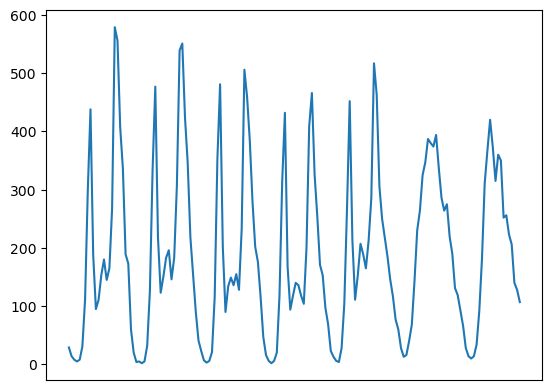

In [88]:
plt.plot(bike_targets.loc["2011-06-06": "2011-06-12"])
plt.axvline(["2011-06-11"], c = "r")
plt.show()

In [89]:
predictions_with_dates = pd.DataFrame(predictions).set_index(bike_targets.index)

ConversionError: Failed to convert value(s) to axis units: array(['2011-06-06T00:00:00.000000000', '2011-06-06T01:00:00.000000000',
       '2011-06-06T02:00:00.000000000', '2011-06-06T03:00:00.000000000',
       '2011-06-06T04:00:00.000000000', '2011-06-06T05:00:00.000000000',
       '2011-06-06T06:00:00.000000000', '2011-06-06T07:00:00.000000000',
       '2011-06-06T08:00:00.000000000', '2011-06-06T09:00:00.000000000',
       '2011-06-06T10:00:00.000000000', '2011-06-06T11:00:00.000000000',
       '2011-06-06T12:00:00.000000000', '2011-06-06T13:00:00.000000000',
       '2011-06-06T14:00:00.000000000', '2011-06-06T15:00:00.000000000',
       '2011-06-06T16:00:00.000000000', '2011-06-06T17:00:00.000000000',
       '2011-06-06T18:00:00.000000000', '2011-06-06T19:00:00.000000000',
       '2011-06-06T20:00:00.000000000', '2011-06-06T21:00:00.000000000',
       '2011-06-06T22:00:00.000000000', '2011-06-06T23:00:00.000000000',
       '2011-06-07T00:00:00.000000000', '2011-06-07T01:00:00.000000000',
       '2011-06-07T02:00:00.000000000', '2011-06-07T03:00:00.000000000',
       '2011-06-07T04:00:00.000000000', '2011-06-07T05:00:00.000000000',
       '2011-06-07T06:00:00.000000000', '2011-06-07T07:00:00.000000000',
       '2011-06-07T08:00:00.000000000', '2011-06-07T09:00:00.000000000',
       '2011-06-07T10:00:00.000000000', '2011-06-07T11:00:00.000000000',
       '2011-06-07T12:00:00.000000000', '2011-06-07T13:00:00.000000000',
       '2011-06-07T14:00:00.000000000', '2011-06-07T15:00:00.000000000',
       '2011-06-07T16:00:00.000000000', '2011-06-07T17:00:00.000000000',
       '2011-06-07T18:00:00.000000000', '2011-06-07T19:00:00.000000000',
       '2011-06-07T20:00:00.000000000', '2011-06-07T21:00:00.000000000',
       '2011-06-07T22:00:00.000000000', '2011-06-07T23:00:00.000000000',
       '2011-06-08T00:00:00.000000000', '2011-06-08T01:00:00.000000000',
       '2011-06-08T02:00:00.000000000', '2011-06-08T03:00:00.000000000',
       '2011-06-08T04:00:00.000000000', '2011-06-08T05:00:00.000000000',
       '2011-06-08T06:00:00.000000000', '2011-06-08T07:00:00.000000000',
       '2011-06-08T08:00:00.000000000', '2011-06-08T09:00:00.000000000',
       '2011-06-08T10:00:00.000000000', '2011-06-08T11:00:00.000000000',
       '2011-06-08T12:00:00.000000000', '2011-06-08T13:00:00.000000000',
       '2011-06-08T14:00:00.000000000', '2011-06-08T15:00:00.000000000',
       '2011-06-08T16:00:00.000000000', '2011-06-08T17:00:00.000000000',
       '2011-06-08T18:00:00.000000000', '2011-06-08T19:00:00.000000000',
       '2011-06-08T20:00:00.000000000', '2011-06-08T21:00:00.000000000',
       '2011-06-08T22:00:00.000000000', '2011-06-08T23:00:00.000000000',
       '2011-06-09T00:00:00.000000000', '2011-06-09T01:00:00.000000000',
       '2011-06-09T02:00:00.000000000', '2011-06-09T03:00:00.000000000',
       '2011-06-09T04:00:00.000000000', '2011-06-09T05:00:00.000000000',
       '2011-06-09T06:00:00.000000000', '2011-06-09T07:00:00.000000000',
       '2011-06-09T08:00:00.000000000', '2011-06-09T09:00:00.000000000',
       '2011-06-09T10:00:00.000000000', '2011-06-09T11:00:00.000000000',
       '2011-06-09T12:00:00.000000000', '2011-06-09T13:00:00.000000000',
       '2011-06-09T14:00:00.000000000', '2011-06-09T15:00:00.000000000',
       '2011-06-09T16:00:00.000000000', '2011-06-09T17:00:00.000000000',
       '2011-06-09T18:00:00.000000000', '2011-06-09T19:00:00.000000000',
       '2011-06-09T20:00:00.000000000', '2011-06-09T21:00:00.000000000',
       '2011-06-09T22:00:00.000000000', '2011-06-09T23:00:00.000000000',
       '2011-06-10T00:00:00.000000000', '2011-06-10T01:00:00.000000000',
       '2011-06-10T02:00:00.000000000', '2011-06-10T03:00:00.000000000',
       '2011-06-10T04:00:00.000000000', '2011-06-10T05:00:00.000000000',
       '2011-06-10T06:00:00.000000000', '2011-06-10T07:00:00.000000000',
       '2011-06-10T08:00:00.000000000', '2011-06-10T09:00:00.000000000',
       '2011-06-10T10:00:00.000000000', '2011-06-10T11:00:00.000000000',
       '2011-06-10T12:00:00.000000000', '2011-06-10T13:00:00.000000000',
       '2011-06-10T14:00:00.000000000', '2011-06-10T15:00:00.000000000',
       '2011-06-10T16:00:00.000000000', '2011-06-10T17:00:00.000000000',
       '2011-06-10T18:00:00.000000000', '2011-06-10T19:00:00.000000000',
       '2011-06-10T20:00:00.000000000', '2011-06-10T21:00:00.000000000',
       '2011-06-10T22:00:00.000000000', '2011-06-10T23:00:00.000000000',
       '2011-06-11T00:00:00.000000000', '2011-06-11T01:00:00.000000000',
       '2011-06-11T02:00:00.000000000', '2011-06-11T03:00:00.000000000',
       '2011-06-11T04:00:00.000000000', '2011-06-11T05:00:00.000000000',
       '2011-06-11T06:00:00.000000000', '2011-06-11T07:00:00.000000000',
       '2011-06-11T08:00:00.000000000', '2011-06-11T09:00:00.000000000',
       '2011-06-11T10:00:00.000000000', '2011-06-11T11:00:00.000000000',
       '2011-06-11T12:00:00.000000000', '2011-06-11T13:00:00.000000000',
       '2011-06-11T14:00:00.000000000', '2011-06-11T15:00:00.000000000',
       '2011-06-11T16:00:00.000000000', '2011-06-11T17:00:00.000000000',
       '2011-06-11T18:00:00.000000000', '2011-06-11T19:00:00.000000000',
       '2011-06-11T20:00:00.000000000', '2011-06-11T21:00:00.000000000',
       '2011-06-11T22:00:00.000000000', '2011-06-11T23:00:00.000000000',
       '2011-06-12T00:00:00.000000000', '2011-06-12T01:00:00.000000000',
       '2011-06-12T02:00:00.000000000', '2011-06-12T03:00:00.000000000',
       '2011-06-12T04:00:00.000000000', '2011-06-12T05:00:00.000000000',
       '2011-06-12T06:00:00.000000000', '2011-06-12T07:00:00.000000000',
       '2011-06-12T08:00:00.000000000', '2011-06-12T09:00:00.000000000',
       '2011-06-12T10:00:00.000000000', '2011-06-12T11:00:00.000000000',
       '2011-06-12T12:00:00.000000000', '2011-06-12T13:00:00.000000000',
       '2011-06-12T14:00:00.000000000', '2011-06-12T15:00:00.000000000',
       '2011-06-12T16:00:00.000000000', '2011-06-12T17:00:00.000000000',
       '2011-06-12T18:00:00.000000000', '2011-06-12T19:00:00.000000000',
       '2011-06-12T20:00:00.000000000', '2011-06-12T21:00:00.000000000',
       '2011-06-12T22:00:00.000000000', '2011-06-12T23:00:00.000000000'],
      dtype='datetime64[ns]')

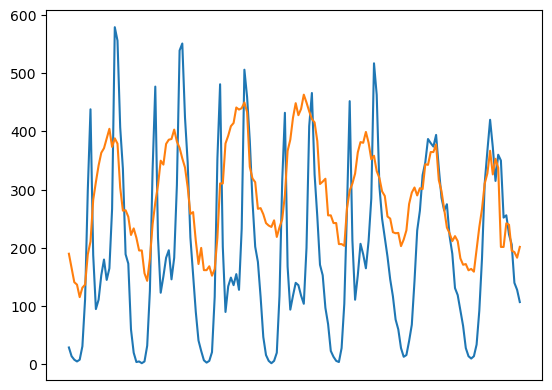

In [90]:
plt.plot(bike_targets.loc["2011-06-06": "2011-06-12"])
plt.plot(predictions_with_dates.loc["2011-06-06": "2011-06-12"])
plt.axvline(["2011-06-11"], c = "r")
plt.show()

In [91]:
np.abs(predictions - bike_targets) / predictions

datetime
2011-01-01 00:00:00    0.220509
2011-01-01 01:00:00    4.579444
2011-01-01 02:00:00    3.463555
2011-01-01 03:00:00    0.566245
2011-01-01 04:00:00    0.966634
                         ...   
2012-12-19 19:00:00    0.403643
2012-12-19 20:00:00    0.203782
2012-12-19 21:00:00    0.056780
2012-12-19 22:00:00    0.271019
2012-12-19 23:00:00    0.435691
Name: count, Length: 10886, dtype: float64

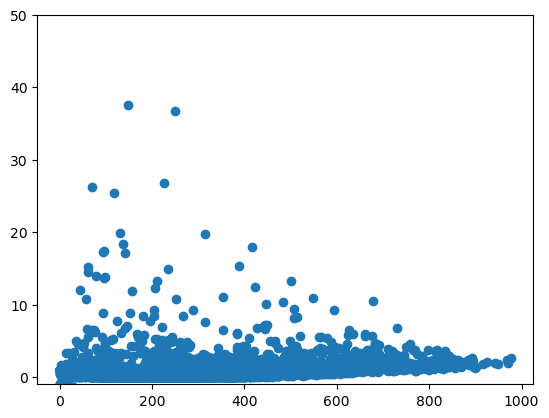

In [92]:
plt.scatter(bike_targets, np.abs(predictions - bike_targets) / predictions)
plt.ylim(-1, 50)
plt.show()

In [93]:
(np.abs(predictions - bike_targets) / predictions).mean()

0.6240970231087334

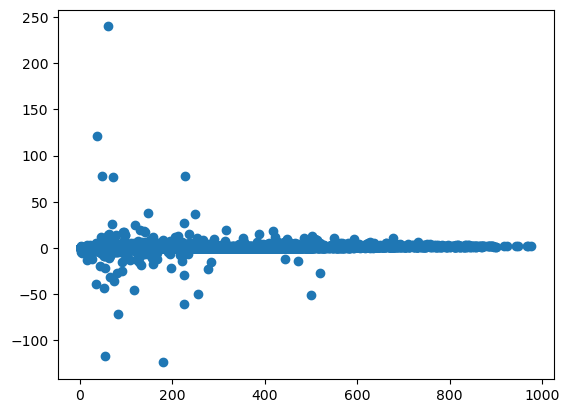

In [94]:
plt.scatter(bike_targets, np.abs(predictions - bike_targets) / predictions)

In [95]:
bike_attributes_train, bike_attributes_test, bike_targets_train, bike_targets_test = train_test_split(bike_attributes, bike_targets, shuffle=False, test_size=0.8)

In [96]:
bike_attributes.values

array([[ 9.84 , 14.395, 81.   , ...,  0.   ,  0.   ,  0.   ],
       [ 9.02 , 13.635, 80.   , ...,  0.   ,  0.   ,  0.   ],
       [ 9.02 , 13.635, 80.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [13.94 , 15.91 , 61.   , ...,  0.   ,  0.   ,  0.   ],
       [13.94 , 17.425, 61.   , ...,  0.   ,  0.   ,  0.   ],
       [13.12 , 16.665, 66.   , ...,  0.   ,  0.   ,  0.   ]])

In [97]:
linear_model = LinearRegression()
linear_model.fit(bike_attributes_train, bike_targets_train)

LinearRegression()

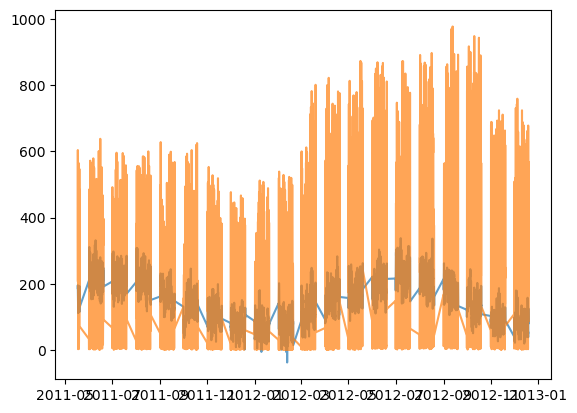

In [98]:
plt.plot(bike_targets_test.index, linear_model.predict(bike_attributes_test), alpha = 0.7)
plt.plot(bike_targets_test, alpha = 0.7)
plt.show()

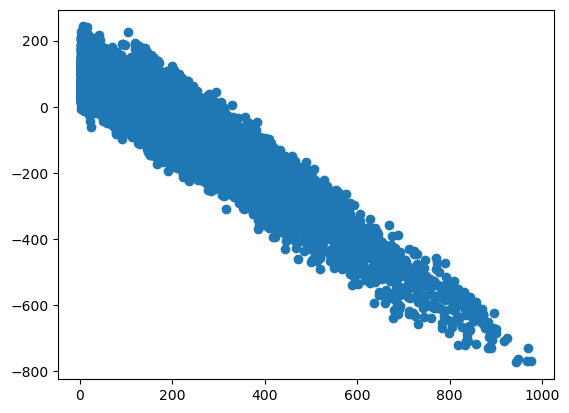

In [99]:
plt.scatter(bike_targets_test, linear_model.predict(bike_attributes_test) - bike_targets_test)

In [100]:
bike_attributes.temp.corr(bike_attributes.temp)

1.0

In [101]:
bike_attributes[["temp"]]

,temp
datetime,
2011-01-01 00:00:00,9.84
2011-01-01 01:00:00,9.02
2011-01-01 02:00:00,9.02
2011-01-01 03:00:00,9.84
2011-01-01 04:00:00,9.84
...,...
2012-12-19 19:00:00,15.58
2012-12-19 20:00:00,14.76
2012-12-19 21:00:00,13.94


In [102]:
bike_attributes[["temp"]].shift()

,temp
datetime,
2011-01-01 00:00:00,NaN
2011-01-01 01:00:00,9.84
2011-01-01 02:00:00,9.02
2011-01-01 03:00:00,9.02
2011-01-01 04:00:00,9.84
...,...
2012-12-19 19:00:00,15.58
2012-12-19 20:00:00,15.58
2012-12-19 21:00:00,14.76


In [103]:
bike_attributes["temp"].corr(bike_attributes["temp"].shift(3))

0.9621756391874446

In [104]:
for i in range(51):
    print(i, bike_attributes["temp"].corr(bike_attributes["temp"].shift(i)))

0 1.0
1 0.9919910819511228
2 0.979428658831437
3 0.9621756391874446
4 0.9416740214174729
5 0.9193976171914116
6 0.8969417104198402
7 0.8754875085885895
8 0.8560356450541199
9 0.8393776152482058
10 0.826120235174702
11 0.8165586670396048
12 0.8107299505588802
13 0.8088914186677167
14 0.8109990634508641
15 0.8166535334893887
16 0.8254670402032547
17 0.8367687435094286
18 0.8499060091207867
19 0.8636643654314767
20 0.8771211221891257
21 0.888740398700875
22 0.8973092979692824
23 0.9014873135987679
24 0.9005078779855858
25 0.8939526031139302
26 0.8821089983578652
27 0.8661737204635448
28 0.8475507599861654
29 0.827575501734182
30 0.8073843466836313
31 0.7881804706288742
32 0.7709025464823233
33 0.7563958006829298
34 0.7451758927097297
35 0.7374738042066693
36 0.7335580857294434
37 0.7335305128767106
38 0.7371946499414335
39 0.7443689306820368
40 0.7547290765996627
41 0.7676145500575334
42 0.7823262001467948
43 0.7976120787136932
44 0.8123605698029974
45 0.8252441001013764
46 0.835014333779

In [105]:
acf(bike_attributes.temp, nlags=10)

array([1.        , 0.99187209, 0.97918869, 0.96181958, 0.94122728,
       0.91887126, 0.89634023, 0.8748074 , 0.85527096, 0.83855342,
       0.82527177])

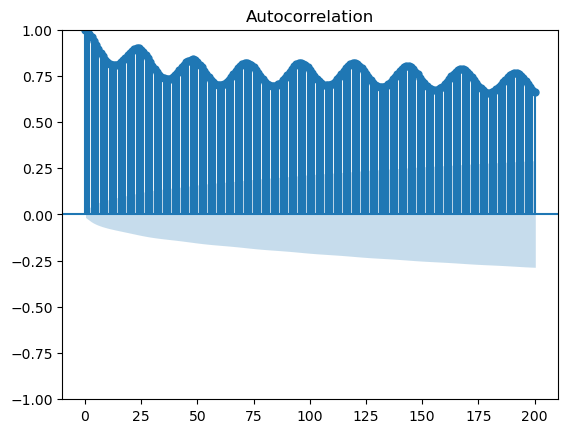

In [106]:
plot_acf(bike_attributes.temp, lags=200)
plt.show()

/Users/ivelin.borisov/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


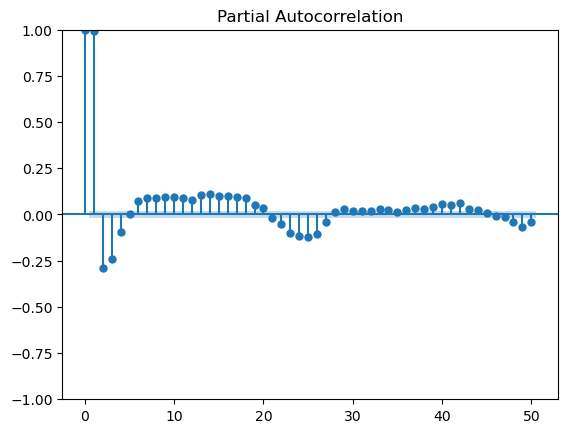

In [107]:
plot_pacf(bike_attributes.temp, lags=50)
plt.show()

In [108]:
columns = ['temp', 'atemp', 'humidity', 'windspeed', 'season_2', 'season_3', 'season_4',
            'holiday_1', 'workingday_1', 'weather_2', 'weather_3', 'weather_4']

for lag in [1, 2, 3, 6, 12, 24, 48, 96]:
    lagged_bike_attributes = bike_attributes[columns].shift(lag).rename(columns=lambda col: col + f"_lag{lag}")
    bike_attributes = bike_attributes.merge(lagged_bike_attributes, left_index=True, right_index=True)

In [111]:
columns = ['temp', 'atemp', 'humidity', 'windspeed', 'season_2', 'season_3', 'season_4',
            'holiday_1', 'workingday_1', 'weather_2', 'weather_3', 'weather_4']

for diff_index in [1, 2, 6, 8, 12]:
    diffed_bike_attributes = bike_attributes[columns].diff(diff_index).rename(columns=lambda col: col + f"_diff{diff_index}")
    bike_attributes = bike_attributes.merge(diffed_bike_attributes, left_index=True, right_index=True)

In [110]:
bike_attributes

,temp,atemp,humidity,windspeed,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,...,humidity_diff12,windspeed_diff12,season_2_diff12,season_3_diff12,season_4_diff12,holiday_1_diff12,workingday_1_diff12,weather_2_diff12,weather_3_diff12,weather_4_diff12
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,9.02,13.635,80,0.0000,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00,9.02,13.635,80,0.0000,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 03:00:00,9.84,14.395,75,0.0000,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 04:00:00,9.84,14.395,75,0.0000,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,15.58,19.695,50,26.0027,0,0,1,0,1,0,...,-25.0,17.0046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-19 20:00:00,14.76,17.425,57,15.0013,0,0,1,0,1,0,...,-30.0,7.9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-19 21:00:00,13.94,15.910,61,15.0013,0,0,1,0,1,0,...,-14.0,7.9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
bike_attributes.columns.tolist()

['temp',
 'atemp',
 'humidity',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'holiday_1',
 'workingday_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'temp_lag1',
 'atemp_lag1',
 'humidity_lag1',
 'windspeed_lag1',
 'season_2_lag1',
 'season_3_lag1',
 'season_4_lag1',
 'holiday_1_lag1',
 'workingday_1_lag1',
 'weather_2_lag1',
 'weather_3_lag1',
 'weather_4_lag1',
 'temp_lag2',
 'atemp_lag2',
 'humidity_lag2',
 'windspeed_lag2',
 'season_2_lag2',
 'season_3_lag2',
 'season_4_lag2',
 'holiday_1_lag2',
 'workingday_1_lag2',
 'weather_2_lag2',
 'weather_3_lag2',
 'weather_4_lag2',
 'temp_lag3',
 'atemp_lag3',
 'humidity_lag3',
 'windspeed_lag3',
 'season_2_lag3',
 'season_3_lag3',
 'season_4_lag3',
 'holiday_1_lag3',
 'workingday_1_lag3',
 'weather_2_lag3',
 'weather_3_lag3',
 'weather_4_lag3',
 'temp_lag6',
 'atemp_lag6',
 'humidity_lag6',
 'windspeed_lag6',
 'season_2_lag6',
 'season_3_lag6',
 'season_4_lag6',
 'holiday_1_lag6',
 'workingday_1_lag6',
 'weather_2_lag6',
 'weathe

In [113]:
bike_attributes = bike_attributes.dropna()

In [114]:
bike_attributes.sample()

,temp,atemp,humidity,windspeed,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,...,humidity_diff12_y,windspeed_diff12_y,season_2_diff12_y,season_3_diff12_y,season_4_diff12_y,holiday_1_diff12_y,workingday_1_diff12_y,weather_2_diff12_y,weather_3_diff12_y,weather_4_diff12_y
datetime,,,,,,,,,,,,,,,,,,,,,
2012-09-03 04:00:00,27.06,29.545,89,6.0032,0,1,0,1,0,0,...,19.0,6.0032,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [115]:
bike_targets = bike_targets.loc[bike_attributes.index]

In [116]:
bike_attributes[columns].temp

datetime
2011-01-05 05:00:00     9.02
2011-01-05 06:00:00     8.20
2011-01-05 07:00:00     7.38
2011-01-05 08:00:00     8.20
2011-01-05 09:00:00     9.02
                       ...  
2012-12-19 19:00:00    15.58
2012-12-19 20:00:00    14.76
2012-12-19 21:00:00    13.94
2012-12-19 22:00:00    13.94
2012-12-19 23:00:00    13.12
Name: temp, Length: 10790, dtype: float64

In [117]:
bike_attributes[columns].temp.diff()

datetime
2011-01-05 05:00:00     NaN
2011-01-05 06:00:00   -0.82
2011-01-05 07:00:00   -0.82
2011-01-05 08:00:00    0.82
2011-01-05 09:00:00    0.82
                       ... 
2012-12-19 19:00:00    0.00
2012-12-19 20:00:00   -0.82
2012-12-19 21:00:00   -0.82
2012-12-19 22:00:00    0.00
2012-12-19 23:00:00   -0.82
Name: temp, Length: 10790, dtype: float64

In [118]:
bike_attributes.shape

(10790, 228)

In [119]:
bike_attributes_train, bike_attributes_test, bike_targets_train, bike_targets_test = train_test_split(bike_attributes, bike_targets, shuffle=True, test_size=0.8)

In [121]:
bike_attributes_train.shape, bike_attributes_test.shape, bike_targets_train.shape, bike_targets_test.shape

((2158, 228), (8632, 228), (2158,), (8632,))

In [122]:
scaler = MinMaxScaler()
scaler.fit(bike_attributes_train)

MinMaxScaler()

In [123]:
bike_attributes_train = scaler.transform(bike_attributes_train)

In [124]:
bike_attributes_test = scaler.transform(bike_attributes_test)

In [125]:
for target_lag in range(1, 6):
    bike_attributes[f"count_lag{target_lag}"] = bike_targets.shift(target_lag)

In [126]:
bike_attributes.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'season_2', 'season_3',
       'season_4', 'holiday_1', 'workingday_1', 'weather_2',
       ...
       'holiday_1_diff12_y', 'workingday_1_diff12_y', 'weather_2_diff12_y',
       'weather_3_diff12_y', 'weather_4_diff12_y', 'count_lag1', 'count_lag2',
       'count_lag3', 'count_lag4', 'count_lag5'],
      dtype='object', length=233)

In [127]:
bike_attributes.sample()

,temp,atemp,humidity,windspeed,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,...,holiday_1_diff12_y,workingday_1_diff12_y,weather_2_diff12_y,weather_3_diff12_y,weather_4_diff12_y,count_lag1,count_lag2,count_lag3,count_lag4,count_lag5
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-18 17:00:00,9.02,11.365,82,12.998,0,0,0,0,1,1,...,255.0,1.0,1.0,0.0,0.0,61.0,35.0,28.0,22.0,3.0


In [128]:
bike_attributes = bike_attributes.fillna(0)

In [129]:
scaler = MinMaxScaler()
scaler.fit(bike_attributes_train)

MinMaxScaler()

In [130]:
bike_attributes_train = scaler.transform(bike_attributes_train)
bike_attributes_test = scaler.transform(bike_attributes_test)

In [131]:
linear_model = LinearRegression()
linear_model.fit(bike_attributes_train, bike_targets_train)

LinearRegression()

In [132]:
linear_model.score(bike_attributes_train, bike_targets_train)

0.4718657167616491

In [133]:
linear_model.score(bike_attributes_test, bike_targets_test)

-4.079274910004667e+23

(-100.0, 100.0)

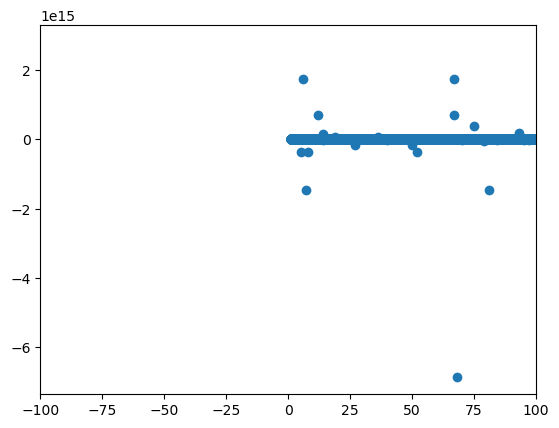

In [135]:
plt.scatter(bike_targets_test, linear_model.predict(bike_attributes_test) - bike_targets_test)
plt.xlim(-100, 100)

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        7.000e+00, 8.618e+03, 2.000e+00, 1.000e+00]),
 array([-6.87831151e+15, -5.90723660e+15, -4.93616169e+15, -3.96508679e+15,
        -2.99401188e+15, -2.02293697e+15, -1.05186207e+15, -8.07871606e+13,
         8.90287746e+14,  1.86136265e+15,  2.83243756e+15]),
 <BarContainer object of 10 artists>)

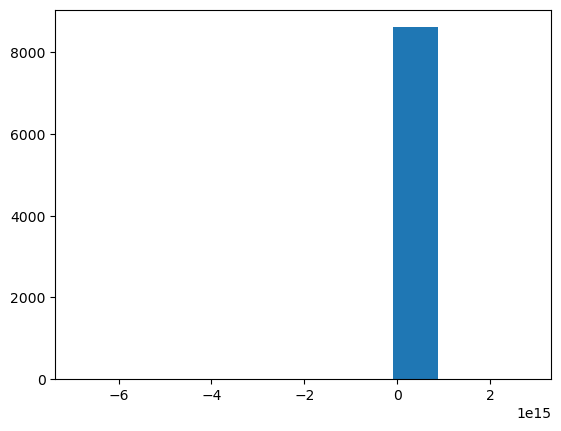

In [136]:
plt.hist(linear_model.predict(bike_attributes_test) - bike_targets_test)

In [137]:
residuals = linear_model.predict(bike_attributes_test) - bike_targets_test

In [141]:
pd.qcut(residuals, 20).value_counts().sort_index()

(-6878311505992742.0, -279.225]    432
(-279.225, -180.906]               432
(-180.906, -123.419]               431
(-123.419, -84.425]                432
(-84.425, -57.625]                 432
(-57.625, -36.231]                 431
(-36.231, -18.875]                 432
(-18.875, -3.162]                  431
(-3.162, 10.938]                   433
(10.938, 24.312]                   431
(24.312, 36.062]                   432
(36.062, 47.375]                   432
(47.375, 59.75]                    431
(59.75, 72.356]                    430
(72.356, 85.25]                    433
(85.25, 100.188]                   432
(100.188, 117.938]                 431
(117.938, 141.188]                 432
(141.188, 177.828]                 430
(177.828, 2832437558865886.0]      432
Name: count, dtype: int64